In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.decomposition import NMF
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from IPython.core.display import display

In [30]:

titanic = pd.read_csv("train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
#数値でないデータや解釈が難しいデータなどを消去する
titanic = titanic.drop(["PassengerId","Name","Ticket","Cabin"],axis=1)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [32]:
#性別と港をダミー変数化
titanic.loc[titanic["Sex"]=="male","male"]=1
titanic.loc[titanic["Sex"]!="male","male"]=0

dummy = pd.get_dummies(titanic["Embarked"])
titanic = pd.concat([titanic,dummy],axis=1)
titanic =titanic.drop(["Embarked","Sex"],axis=1)


In [33]:
#年齢を平均値で修正
titanic["Age"] = titanic["Age"].fillna(titanic["Age"].mean())

display(titanic.head())
display(titanic.describe())

,Survived,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S
0,0,3,22.0,1,0,7.2500,1.0,0,0,1
1,1,1,38.0,1,0,71.2833,0.0,1,0,0
2,1,3,26.0,0,0,7.9250,0.0,0,0,1
3,1,1,35.0,1,0,53.1000,0.0,0,0,1
4,0,3,35.0,0,0,8.0500,1.0,0,0,1


,Survived,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,0.188552,0.086420,0.722783
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.477990,0.391372,0.281141,0.447876
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

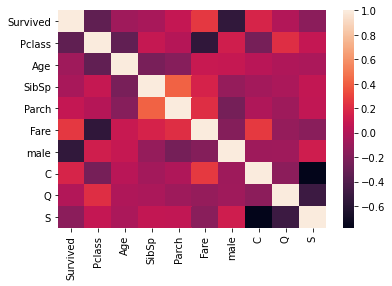

In [34]:
sns.heatmap(titanic.corr(),annot=False)

In [59]:
ss =  sklearn.preprocessing.MinMaxScaler()
X = ss.fit_transform(titanic)

In [73]:
nmf = NMF(n_components=5)
W = nmf.fit_transform(X.T)
H = nmf.components_

In [74]:
print(np.round(W,decimals=2))
print(H)

[[0.   4.18 0.43 0.   0.2 ]
 [0.   0.   0.   5.44 0.2 ]
 [1.29 0.74 0.84 0.   0.81]
 [0.06 0.14 0.01 0.33 0.  ]
 [0.02 0.27 0.03 0.27 0.  ]
 [0.12 0.29 0.27 0.   0.  ]
 [3.31 0.   1.66 0.   1.65]
 [0.   0.02 3.05 0.   0.  ]
 [0.   0.   0.   0.   2.87]
 [3.58 1.83 0.   0.   0.  ]]
[[0.28409758 0.         0.07920157 ... 0.14447071 0.         0.04529629]
 [0.         0.18229389 0.26147992 ... 0.05154163 0.15928674 0.        ]
 [0.0004886  0.26487627 0.         ... 0.         0.37246038 0.02751736]
 [0.18384121 0.00053907 0.18164698 ... 0.18685282 0.         0.16883492]
 [0.00149253 0.         0.         ... 0.         0.04896092 0.38157322]]


<AxesSubplot:>

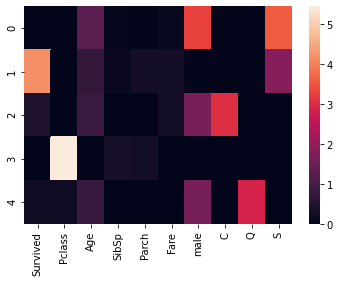

In [75]:
sns.heatmap(W.T,xticklabels=titanic.columns)

In [80]:
y = titanic["Survived"]
x = titanic.drop("Survived",axis=1)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=None )

# データの標準化処理
sc = sklearn.preprocessing.StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

SVC(kernel='linear')

In [ ]:
svc = SVC(kernel='linear')
svc.fit(x,y)


In [88]:

# トレーニングデータに対する精度
pred_train = svc.predict(X_train_std)
accuracy_train = accuracy_score(y_train, pred_train)
print('トレーニングデータに対する正解率： %.3f' % accuracy_train)

トレーニングデータに対する正解率： 0.796


In [89]:
# テストデータに対する精度
pred_test = svc.predict(X_test_std)
accuracy_test = accuracy_score(y_test, pred_test)
print('テストデータに対する正解率： %.3f' % accuracy_test)




テストデータに対する正解率： 0.749
